# I. Research Question
#### Is there a relationship in how happy a country is and the music the people of this country listen to?

### Introduction
Attempting to understand what makes a country "happy" is often attributable to freedom, social support, life expectancy, health, among others. However, the music the people of said country listen to is often not one of these factors given its weak relationship and versatility across the world. Although our research question does not attempt to attribute the type of music a country listens to to its happiness index score (it would be difficult to establish given reverse causality), we are more interested in observing what trends are apparent in some of the happiest and less happiest countries with respect to the music they listen to. 

#### Some additional questions that we are seeking to answer...
- What songs are there (if any) that are popular in all countries regardless of happiness rank?
- Are there genres/styles of music that are consistent with "happy" countries? With "sad" countries? For example, can we expect happy countries to listen to more pop music than sad ones?
- What are the characteristics of songs that are popular in happy countries? Fast or slow tempo? Live vocals or autotune?
- Can we find more instances of happy songs in sad countries than sad songs in happy countries?"

#### The datasets we will be using:

All the datasets were found on Kaggle.
<br>
1. ["World Happiness Report 2017"](https://www.kaggle.com/unsdsn/world-happiness) by Sustainable Development Solutions Network
<br>
The Sustainable Development Solutions Network ranks 155 countries by their happiness levels, and calculates a "happiness score" for each country using six factors: economic production, social support, life expectancy, freedom, absence of corruption, and generosity. This dataset is for the year 2017.
2. ["Spotify's Worldwide Daily Song Ranking"](https://www.kaggle.com/edumucelli/spotifys-worldwide-daily-song-ranking) by Kaggle user
<br>
For each country in 54 countries, this dataset provides the top 200 songs per day in the year of 2017 (January 1, 2017 to January 9, 2018). 
- *Note: the Kaggle description says 53 countries, but we found 54 countries. Perhaps the description was not updated when the dataset was.*
3. ["Spotify Web API"](https://developer.spotify.com/documentation/web-api/reference/) 
<br>
This dataset contains contains characteristics of songs on Spotify. Spotify calculates and gives scores for their songs. Some of these values include scores for danceability, beats per minute (bpm), and liveness (the likeliness that the song is a live recording).

# II. Data Collection and Cleaning

In [1]:
#importing relevant packages
import requests #package for http requests
import bs4 # package for html parsing
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#cid AND secret IS SPECIFIC TO EACH USER. SO EVA, ESTELLE, AND CESAR SHOULD HAVE DIFFERENT CID AND SECRET. 
# Do we have to each make our own cid and secret? or can we just use mine?
#Eva's:
# cid = '24ac9ca75f06477ca560d8c71807dd9e'
# secret = '086fa8a3b056408e9bce55e3245c4af1'

#Estelle's:
cid='c10b42de14134edfb7e9cafa42fc48a2'
secret='b41981d56a924e65a079138f9272e8de'
client_credentials_manager = SpotifyClientCredentials(client_id=cid, client_secret=secret)
sp = spotipy.Spotify(client_credentials_manager
=
client_credentials_manager)

### A. Data cleaning for "World Happiness Report"

In [2]:
#"World Happiness Report 2017"
happy2017=pd.read_csv("2017.csv")
#cleaning up col names
happy2017columns= happy2017.columns
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]
happy2017.columns= happy2017columns
happy2017.head()

,country,happiness_rank,happiness_score,whisker_high,whisker_low,economy_gdp_per_capita_,family,health_life_expectancy_,freedom,generosity,trust_government_corruption_,dystopia_residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [3]:
#removing all columns except for "country", "happiness_rank", and "happiness_score"
happy2017=happy2017.iloc[:,:3]
happy2017.head()

,country,happiness_rank,happiness_score
0,Norway,1,7.537
1,Denmark,2,7.522
2,Iceland,3,7.504
3,Switzerland,4,7.494
4,Finland,5,7.469


In [4]:
#"Spotify's Worldwide Song Ranking"
#This .csv file was so big that not only could we not push it to GitHub, but it was also difficult to load the file on Sheets.
#Locally on her own computer, Eva split up data.csv into 53 individual .csv files by country so that we work with the data.

#allspotifydata=pd.read_csv("data.csv")
#countries=pd.unique(allspotifydata['Region'])

#allcountries=[]
#for country in countries:
    #allcountries.append(allspotifydata[allspotifydata['Region']==country])

#count=1
#for df in allcountries:
    #name='country'+str(count)+'.csv'
    #df.to_csv(r'C:\Users\Eva\Downloads\country'+str(count)+'.csv')
    #count=count+1

In [5]:
#the 54 country .csv split from data.csv
argentina=pd.read_csv("argentina.csv")
australia=pd.read_csv("australia.csv")
austria=pd.read_csv("austria.csv")
belgium=pd.read_csv("belgium.csv")
bolivia=pd.read_csv("bolivia.csv")
brazil=pd.read_csv("brazil.csv")
canada=pd.read_csv("canada.csv")
chile=pd.read_csv("chile.csv")
colombia=pd.read_csv("colombia.csv")
costarica=pd.read_csv("costarica.csv")
czechrepublic=pd.read_csv("czechrepublic.csv")
denmark=pd.read_csv("denmark.csv")
dominicanrepublic=pd.read_csv("dominicanrepublic.csv")
ecuador=pd.read_csv("ecuador.csv")
elsalvador=pd.read_csv('elsalvador.csv')
estonia=pd.read_csv('estonia.csv')
finland=pd.read_csv("finland.csv")
france=pd.read_csv("france.csv")
germany=pd.read_csv("germany.csv")
Global=pd.read_csv('global.csv')
greece=pd.read_csv('greece.csv')
guatemala=pd.read_csv("guatemala.csv")
honduras=pd.read_csv("honduras.csv")
hongkong=pd.read_csv("hongkong.csv")
hungary=pd.read_csv("hungary.csv")
iceland=pd.read_csv("iceland.csv")
indonesia=pd.read_csv("indonesia.csv")
ireland=pd.read_csv("ireland.csv")
italy=pd.read_csv("italy.csv")
japan=pd.read_csv("japan.csv")
latvia=pd.read_csv("latvia.csv")
lithuania=pd.read_csv("lithuania.csv")
luxembourg=pd.read_csv("luxembourg.csv")
malaysia=pd.read_csv("malaysia.csv")
mexico=pd.read_csv("mexico.csv")
netherlands=pd.read_csv("netherlands.csv")
newzealand=pd.read_csv("newzealand.csv")
norway=pd.read_csv("norway.csv")
panama=pd.read_csv("panama.csv")
paraguay=pd.read_csv("paraguay.csv")
peru=pd.read_csv("peru.csv")
philippines=pd.read_csv("philippines.csv")
poland=pd.read_csv("poland.csv")
portugal=pd.read_csv("portugal.csv")
singapore=pd.read_csv("singapore.csv")
slovakia=pd.read_csv("slovakia.csv")
spain=pd.read_csv("spain.csv")
sweden=pd.read_csv("sweden.csv")
switzerland=pd.read_csv("switzerland.csv")
taiwanprovinceofchina=pd.read_csv("taiwan.csv")
turkey=pd.read_csv("turkey.csv")
unitedkingdom=pd.read_csv("unitedkingdom.csv")
unitedstates=pd.read_csv("unitedstates.csv")
uruguay=pd.read_csv("uruguay.csv")

#### 1. Creating a new happiness dataframe that contains only the relevant countries
As noted in our dataset descriptions, the "Worldwide Happiness Ranking\" (happy17) contains happiness data for 155 countries, while "Spotify's Worldwide Song Ranking" contains only 54 countries. <br><br>We needed to find the overlapping countries between these datasets to:
1. Create a new happiness ranking excluding the countries not found in the song ranking dataset, subsetted in the dataframe **happy**
    <br>
2. Figure out which "Spotify's Worldwide Song Rankings" country .csv files we do not need.

In [6]:
#list of all 54 countries from "Spotify's Worldwide Songs"
allspotifycountries=["argentina", "australia", "austria", "belgium", "brazil","bolivia", "canada", "chile", "colombia", "costarica", "czechrepublic","denmark", "dominicanrepublic", "estonia", "elsalvador", "Global","greece", "ecuador", "finland", "france", "germany", "guatemala", "honduras", "hongkong", "hungary", "iceland", "indonesia", "ireland", "italy", "japan", "latvia", "lithuania", "luxembourg", "malaysia", "mexico", "netherlands", "newzealand", "norway", "panama", "paraguay", "peru", "philippines", "poland", "portugal", "singapore", "slovakia", "spain", "sweden", "switzerland", "taiwanprovinceofchina", "turkey", "unitedkingdom", "unitedstates", "uruguay"]

#list for countries that are found in both datsets.
allcountries=[]
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allspotifycountries:
        allcountries.append(country)      

#new happiness ranking dataframe "happy"        
happy=pd.DataFrame({'country':[],'happiness_rank':[],'happiness_score':[]})
for row in range(len(happy2017)):
    country=happy2017.loc[row,'country']
    country=country.lower()
    country=country.replace(" ","")
    if country in allcountries:       
        newrow={'country':happy2017.loc[row,'country'],'happiness_rank':happy2017.loc[row,'happiness_rank'],'happiness_score':happy2017.loc[row,'happiness_score']}
        happy=happy.append(newrow, ignore_index=True)

print("There are "+ str(len(allcountries)) +" countries total that we can use to address our research question.")
print("\n")
print('These are the spotify datsets we should use: ' + str(allcountries))
print("\n")
print("This is the updated happiness ranking:")
print(happy)

There are 52 countries total that we can use to address our research question.


These are the spotify datsets we should use: ['norway', 'denmark', 'iceland', 'switzerland', 'finland', 'netherlands', 'canada', 'newzealand', 'sweden', 'australia', 'costarica', 'austria', 'unitedstates', 'ireland', 'germany', 'belgium', 'luxembourg', 'unitedkingdom', 'chile', 'brazil', 'czechrepublic', 'argentina', 'mexico', 'singapore', 'uruguay', 'guatemala', 'panama', 'france', 'taiwanprovinceofchina', 'spain', 'colombia', 'slovakia', 'malaysia', 'ecuador', 'elsalvador', 'poland', 'italy', 'japan', 'lithuania', 'latvia', 'bolivia', 'peru', 'estonia', 'turkey', 'paraguay', 'philippines', 'hungary', 'indonesia', 'dominicanrepublic', 'greece', 'portugal', 'honduras']


This is the updated happiness ranking:
                     country  happiness_rank  happiness_score
0                     Norway             1.0            7.537
1                    Denmark             2.0            7.522
2             

### B. Data cleaning for "Spotify's Worldwide Song Rankings"

In [7]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

#### 1. Deleting indices that carried over from data.csv
As seen in `norway` below, the first column for every country .csv contains an unnamed column. This column, `Unnamed: 0` contains the original indices from the data.csv file.

In [8]:
norway.head()

,Unnamed: 0,Position,Track Name,Artist,Streams,URL,Date,Region
0,296800,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,296801,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,296802,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,296803,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,296804,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [9]:
def cleancol(dataframe):
    """
    This will get delete the unnamed column that contained the data.csv indices 
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    """
    dataframe.rename({"Unnamed: 0":"a"}, axis="columns", inplace=True)
    dataframe.drop(["a"], axis=1, inplace=True)

In [10]:
#running cleancol on every .csv
for country in countries_to_subset:
    cleancol(country)

Now each country .csv no longer contains the old indices!

In [11]:
norway.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


#### 2. We don't need the top 200 songs per day in a year
The "Spotify Worldwide Song Rankings" from Kaggle is far too excessive for our analysis and research purposes. Providing the top 200 songs per day in a year means that each country .csv file should have around (365+9)x200=74,800 entries (the additional 9 days are because the data set includes the first 9 days of 2018). We decided that we would remove the bottom 150 songs per day in each country's dataset. <br>
It is possible that we may decide to remove even more even later.

In [12]:
#adding the countries we will work with based on the subset below in allcountries. We will use this to subset the first 50 songs below
countries_to_subset = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [13]:
def first_fifty(dataframe):
    """
    This will get the first 50 observations in every 200 observations.
    There should only be 200 observations in 1 day, and there are 365 days per country in this data,
    which is the purpose of this function.
    
    Parameter dataframe: this is the country's dataframe which we will work with.
    Precondition: a pandas dataframe object
    """
    subset_data = dataframe.groupby(dataframe.index//200).head(50)
    dataframe = subset_data.copy()
    dataframe=dataframe.reset_index(drop=True)
    return dataframe

In [14]:
# FAILED CODE!!! Please see VI. QUESTIONS FOR REVIEWERS
# Our for-loop did not work, as shown in our print statements

#running each country in countries_to_subset through the first_fifty procedure
print("Now deleting the bottom 150 songs per day in each country...")
x=0
for file in countries_to_subset:
    print(allcountries[x]+" length before: "+str(len(countries_to_subset[x])))
#   first_fifty(file) #Did not work
    file=first_fifty(file) #Did not work
#   countries_to_subset[x]=first_fifty(file) #Did not work
    print(allcountries[x]+" length after: "+str(len(countries_to_subset[x])))
    x=x+1
print("\n")
print("Unfortunately the lengths are the same before and after. So we'll have to call first_fifty individally for now.")

Now deleting the bottom 150 songs per day in each country...
norway length before: 74200
norway length after: 74200
denmark length before: 74200
denmark length after: 74200
iceland length before: 35835
iceland length after: 35835
switzerland length before: 74200
switzerland length after: 74200
finland length before: 74200
finland length after: 74200
netherlands length before: 74200
netherlands length after: 74200
canada length before: 74200
canada length after: 74200
newzealand length before: 74200
newzealand length after: 74200
sweden length before: 74200
sweden length after: 74200
australia length before: 74200
australia length after: 74200
costarica length before: 74200
costarica length after: 74200
austria length before: 74200
austria length after: 74200
unitedstates length before: 74200
unitedstates length after: 74200
ireland length before: 74200
ireland length after: 74200
germany length before: 74200
germany length after: 74200
belgium length before: 74200
belgium length after:

In [15]:
# doing it by hand because the for-loop did not work
norway = first_fifty(norway)
denmark= first_fifty(denmark)
iceland = first_fifty(iceland)
switzerland= first_fifty(switzerland)
finland = first_fifty(finland)
netherlands= first_fifty(netherlands)
canada = first_fifty(canada)
newzealand= first_fifty(newzealand)
sweden= first_fifty(sweden)
australia= first_fifty(australia)
costarica= first_fifty(costarica)
austria = first_fifty(austria)
unitedstates= first_fifty(unitedstates)
ireland= first_fifty(ireland)
germany= first_fifty(germany)
belgium= first_fifty(belgium)
luxembourg= first_fifty(luxembourg)
unitedkingdom= first_fifty(unitedkingdom)
chile= first_fifty(chile)
brazil= first_fifty(brazil)
czechrepublic= first_fifty(czechrepublic)
argentina= first_fifty(argentina)
mexico= first_fifty(mexico)
singapore= first_fifty(singapore)
uruguay= first_fifty(uruguay)
guatemala= first_fifty(guatemala)
panama= first_fifty(panama)
france= first_fifty(france)
spain= first_fifty(spain)
colombia= first_fifty(colombia)
slovakia= first_fifty(slovakia)
malaysia= first_fifty(malaysia)
ecuador= first_fifty(ecuador)
elsalvador= first_fifty(elsalvador)
poland= first_fifty(poland)
italy= first_fifty(italy)
japan= first_fifty(japan)
lithuania= first_fifty(lithuania)
latvia= first_fifty(latvia)
bolivia= first_fifty(bolivia)
peru= first_fifty(peru)
estonia= first_fifty(estonia)
turkey= first_fifty(turkey)
paraguay= first_fifty(paraguay)
philippines= first_fifty(philippines)
hungary= first_fifty(hungary)
indonesia= first_fifty(indonesia)
dominicanrepublic= first_fifty(dominicanrepublic)
greece= first_fifty(greece)
portugal= first_fifty(portugal)
honduras= first_fifty(honduras)
taiwanprovinceofchina= first_fifty(taiwanprovinceofchina)
print("Now the entries for all dates in 2018 are gone!")
norway.head()

Now the entries for all dates in 2018 are gone!


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


#### 3. We cannot use the data from 2018
We only have happiness rankings for the year of 2017, but the Spotify rankings start in January 1, 2017 and stop at January 9, 2018. Though this is only 9 days in 2018, we cannot use this part of the data set.
<br>
To maintain consistency in out datasets, the function below is excludes all observations, or songs, from 2018 accidentally subsetted in our dataframe. 

In [16]:
def not18(dataframe):
    dataframe['Date'] = pd.to_datetime(dataframe['Date'])
    dataframe = dataframe[dataframe['Date'].dt.year != 2018]
    return dataframe

In [17]:
# FAILED CODE!!! See VI. Questions for Reviewers
# We wanted not18 to run as a procedure so that we could loop it through countries_to_subset. Unfortunately this did not work, 
# so we had to call not18() on every country .csv

for file in countries_to_subset: 
    not18(file)
print("As you can see... our for-loop did not work because the 2018 dates are still there....")
norway.tail()

As you can see... our for-loop did not work because the 2018 dates are still there....


,Position,Track Name,Artist,Streams,URL,Date,Region
18545,46,1-800-273-8255,Logic,29928,https://open.spotify.com/track/5tz69p7tJuGPeMG...,2018-01-09,no
18546,47,Pumped Up,Klingande,29918,https://open.spotify.com/track/4BM4ml3TgBFALLa...,2018-01-09,no
18547,48,Despacito - Remix,Luis Fonsi,28240,https://open.spotify.com/track/5CtI0qwDJkDQGwX...,2018-01-09,no
18548,49,Om 100 år er allting glemt,Staysman & Lazz,27684,https://open.spotify.com/track/0nOPesKbUurHFZM...,2018-01-09,no
18549,50,Gucci Gang,Lil Pump,27582,https://open.spotify.com/track/43ZyHQITOjhciSU...,2018-01-09,no


In [18]:
#using not18() procedure on all country .csv because the for-loop failed 
norway = not18(norway)
denmark= not18(denmark)
iceland = not18(iceland)
switzerland= not18(switzerland)
finland = not18(finland)
netherlands= not18(netherlands)
canada = not18(canada)
newzealand= not18(newzealand)
sweden= not18(sweden)
australia= not18(australia)
costarica= not18(costarica)
austria = not18(austria)
unitedstates= not18(unitedstates)
ireland= not18(ireland)
germany= not18(germany)
belgium= not18(belgium)
luxembourg= not18(luxembourg)
unitedkingdom= not18(unitedkingdom)
chile= not18(chile)
brazil= not18(brazil)
czechrepublic= not18(czechrepublic)
argentina= not18(argentina)
mexico= not18(mexico)
singapore= not18(singapore)
uruguay= not18(uruguay)
guatemala= not18(guatemala)
panama= not18(panama)
france= not18(france)
spain= not18(spain)
colombia= not18(colombia)
slovakia= not18(slovakia)
malaysia= not18(malaysia)
ecuador= not18(ecuador)
elsalvador= not18(elsalvador)
poland= not18(poland)
italy= not18(italy)
japan= not18(japan)
lithuania= not18(lithuania)
latvia= not18(latvia)
bolivia= not18(bolivia)
peru= not18(peru)
estonia= not18(estonia)
turkey= not18(turkey)
paraguay= not18(paraguay)
philippines= not18(philippines)
hungary= not18(hungary)
indonesia= not18(indonesia)
dominicanrepublic= not18(dominicanrepublic)
greece= not18(greece)
portugal= not18(portugal)
honduras= not18(honduras)
taiwanprovinceofchina= not18(taiwanprovinceofchina)

print("Now the 2018 dates are gone!")
norway.head()

Now the 2018 dates are gone!


,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


In [19]:
happy.head()

,country,happiness_rank,happiness_score
0,Norway,1.0,7.537
1,Denmark,2.0,7.522
2,Iceland,3.0,7.504
3,Switzerland,4.0,7.494
4,Finland,5.0,7.469


##### Column Descriptions
- `happiness_score` the sum of each `happiness_score`, `economy_gdp_per_capita_`, `health_life_expectancy_`, `freedom`, `generosity`, `	trust_government_corruption_`, and `dystopia_residual` scores. These individual scores reflect the "six factors" used to calculate happiness in the description above.<br>
- `Happiness.Rank` the ranking of each country's happiness scores, from highest happiness score to the lowest<br>
- `Country` the country being ranked/scored<br>

* **For our research purposes, we will only be keeping the following columns: `country`,`happiness_rank`, and `happiness_score`.**

#### II. "Spotify's World Song Rankings"

In [20]:
norway.head()

,Position,Track Name,Artist,Streams,URL,Date,Region
0,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


##### Column Descriptions
- `position` the rank of the song.<br>
- `track_name` the of the song<br>
- `artist` the artist<br>
- `streams` the streams/day<br>
- `url` the Spotify URL<br>
- `date` the date the songs were streamed<br>
- `region` country, by postal code<br>

### IV. Data Limitations

1) Given we are dealing with a relatively sample of only 2017, albeit with 50 songs per day, drawing conclusions for what type of music a happy or unhappy country listens may not prove out to be as accurate as we would like it to be. We can say, however, that the culture of a country likely does not vary signficantly from one year to another, so the top genres and happy scores may reflect of the country's values to an extent.

2) Some countries were omitted in order to be able to use the countries in the happiness index and those in our spotify data. In order to draw some observations, we had to find overlap in songs. This may naturally produce bias since some potentially happy countries with potentially signficant relationships to music will completely be overlooked due to availability of data. This concerns mainly the overarching/big picture of happy countries and certain genres being more common.

3) We are relying on the genre and danceability score for specific songs provided by a dataset. It is possible this dataset contains subjective information to the user, hence the genres and danceability scores may not reflect the names the people of the country would utilize.

4) Certain countries use other streaming services opposed to Spotify. For example, Japan uses has it's own streaming service that is more popular than Spotify. Therefore, we techinically aren't getting the most popular songs of reach country, but rather the most popular songs offered on Spotify for each country.

5) We removed over half of the countries on the Happiness Index. Therefore when we begin to categorize countries as "sad", they may not actually be very "sad" in comparison to the countries we removed. It will be important for us to look at the scores as well as the ranks.

6) We are are comparing happiness from 2017, which is about 4 years ago. Trends in music have changed and we need to understand what is popular now is different from what it was back then.

In [21]:
filez = [norway, denmark, iceland, switzerland, finland, 
                       netherlands, canada, newzealand, sweden, australia, costarica, austria, 
                       unitedstates, ireland, germany, belgium, luxembourg, unitedkingdom, 
                       chile, brazil, czechrepublic, argentina, mexico, singapore, uruguay, guatemala,
                       panama, france, taiwanprovinceofchina, spain, colombia, slovakia, malaysia, ecuador, elsalvador, poland, 
                       italy, japan,lithuania, latvia, bolivia, peru, estonia, turkey, paraguay, 
                       philippines, hungary, indonesia, dominicanrepublic, greece, portugal, honduras]

In [22]:
def change(d):
    '''
    changes column names to all lower case 
    '''
    new_colnames = d.columns
    new_colnames = [x.lower().replace(' ', '_') for x in new_colnames]
#     d = d.copy()
    d.columns=new_colnames

    d.dropna(inplace=True)
    d.reset_index(drop=True,inplace=True)
#     return r

In [23]:
happy2017columns= [x.lower() for x in happy2017columns]
happy2017columns= [x.replace("..",".") for x in happy2017columns]
happy2017columns= [x.replace(".","_") for x in happy2017columns]

In [24]:
for file in filez:
    change(file)

In [25]:
print(norway.shape)
norway.head()

(18094, 7)


,position,track_name,artist,streams,url,date,region
0,1,Alone,Alan Walker,103886,https://open.spotify.com/track/0JiVRyTJcJnmlwC...,2017-01-01,no
1,2,Rockabye (feat. Sean Paul & Anne-Marie),Clean Bandit,85990,https://open.spotify.com/track/5knuzwU65gJK7IF...,2017-01-01,no
2,3,I Don’t Wanna Live Forever (Fifty Shades Darke...,ZAYN,68706,https://open.spotify.com/track/3NdDpSvN911VPGi...,2017-01-01,no
3,4,Call On Me - Ryan Riback Extended Remix,Starley,60334,https://open.spotify.com/track/78rIJddV4X0HkNA...,2017-01-01,no
4,5,I Feel It Coming,The Weeknd,56607,https://open.spotify.com/track/5GXAXm5YOmYT0kL...,2017-01-01,no


# V. Exploratory data analysis

In [26]:
# unique = np.array(norway['track_name'].unique())
# p = [norway[norway['track_name']==i].loc[:,'streams'].mean() for i in unique]
# plt.plot(unique, p)
# plt.xlabel('track_name')
# plt.ylabel('streams')

Text(0.5, 1.0, 'Country Happiness Score 2017')

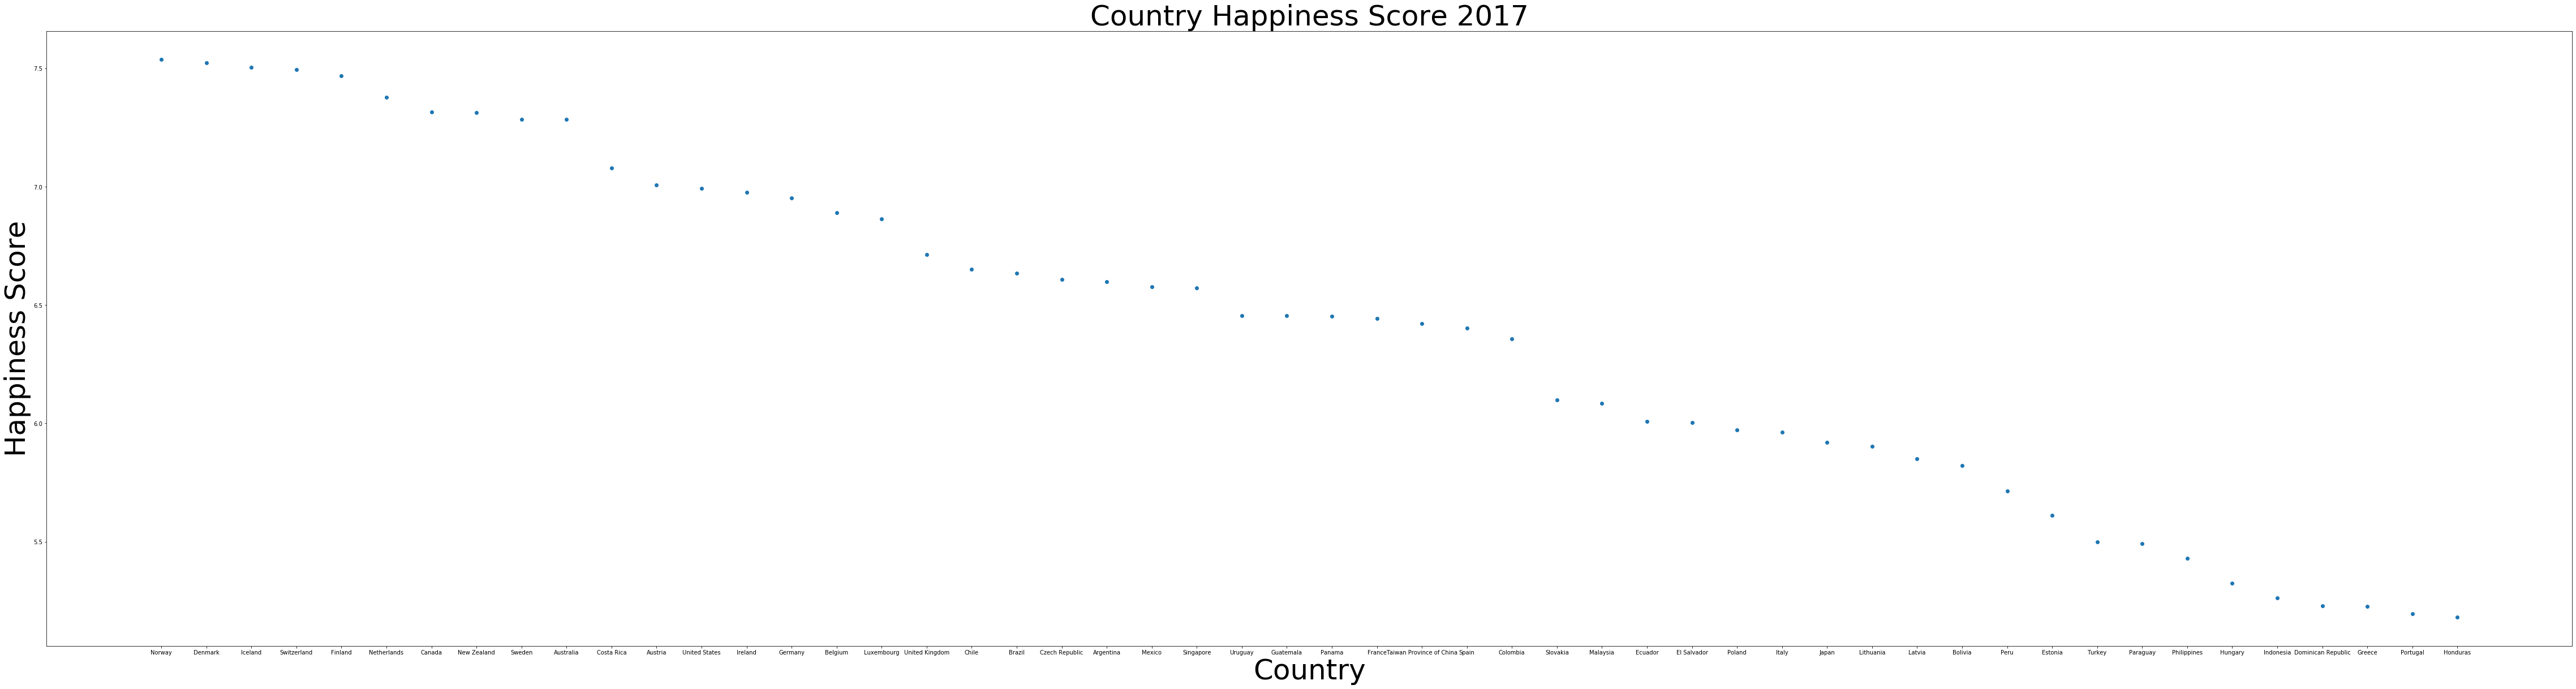

In [27]:
plt.figure(figsize=(80,20))

plt.scatter(happy['country'], happy['happiness_score'])
plt.xlabel('Country', fontsize=50)
plt.ylabel('Happiness Score', fontsize=50)
plt.title('Country Happiness Score 2017', fontsize=50)

In [28]:
#Accessing the Spotify API

# Need to access the last part of the Spotify URL in each country dataset to then use to access genre in 1921-2020 dataset (which uses this part of
# the link as the ID). Most links are in this format: https://open.spotify.com/track/6yc377A8qxHIjPUcjGD4ET. We need to pull out this part: 6yc377A8qxHIjPUcjGD4ET.
# After pulling out this part, we need to search through the ID column in data.csv to find the matching ID, then access the key, which we can use in the data_by_genres.csv to
# locate the genre.

In [29]:
sp.audio_features('5aAx2yezTd8zXrkmtKl66Z')[0]

{'danceability': 0.681,
 'energy': 0.594,
 'key': 7,
 'loudness': -7.028,
 'mode': 1,
 'speechiness': 0.282,
 'acousticness': 0.165,
 'instrumentalness': 3.49e-06,
 'liveness': 0.134,
 'valence': 0.535,
 'tempo': 186.054,
 'type': 'audio_features',
 'id': '5aAx2yezTd8zXrkmtKl66Z',
 'uri': 'spotify:track:5aAx2yezTd8zXrkmtKl66Z',
 'track_href': 'https://api.spotify.com/v1/tracks/5aAx2yezTd8zXrkmtKl66Z',
 'analysis_url': 'https://api.spotify.com/v1/audio-analysis/5aAx2yezTd8zXrkmtKl66Z',
 'duration_ms': 230453,
 'time_signature': 4}

In [30]:
print(len(belgium.columns))
print(len(norway.columns))

7
7


In [31]:
print(belgium.columns)

Index(['position', 'track_name', 'artist', 'streams', 'url', 'date', 'region'], dtype='object')


In [32]:
# import pandas as pd
# df = pd.DataFrame()

# def applyfunction(row):

#     return { 
#         'column1': row['columna'], 
#         'column2': somefunction(row['columnb']) 
#     }

# df.apply(applyfunction)



#df.apply(axis=1)
#function takes in a row and spits out a row


# def audioinfo(row):
#     #print(row)
#     url=row['url']
#     sub=url.rindex('/')
#     idurl=url[sub+1:]
#     audiofeatures=sp.audio_features(idurl)[0]
#     #print(audiofeatures)
#     print(row.update(audiofeatures))
#     return pd.Series(row.update(audiofeatures))
    
#audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})

# happy=pd.DataFrame({'Country':[],'Happiness.Rank':[],'Happiness.Score':[]})
# for row in range(len(happy2017)):
#     country=happy2017.loc[row,'Country']
#     country=country.lower()
#     country=country.replace(" ","")
#     if country in allcountries:       
#         newrow={'Country':happy2017.loc[row,'Country'],'Happiness.Rank':happy2017.loc[row,'Happiness.Rank'],'Happiness.Score':happy2017.loc[row,'Happiness.Score']}
#         happy=happy.append(newrow, ignore_index=True)


def audioinfo(dataframe):
    audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})
    for row in range(len(dataframe)):
        #print(row)
        url=dataframe.loc[row,'url']
        sub=url.rindex('/')
        idurl=url[sub+1:]
        newrow=sp.audio_features(idurl)[0]
        #print(newrow)
        audiofeatures=audiofeatures.append(newrow,ignore_index=True)  
        print(audiofeatures)
    #print(audiofeatures.head)
    #concat at the end of for loop. loop through all songs, make separate dataframe for that 
    #print(dataframe.head)
    
    #dataframe=pd.concat([dataframe,audiofeatures])
    #print(audiofeatures)
    
    
# def audioinfo(dataframe):
#     orignumcol=len(dataframe.columns)
#     for row in range(len(dataframe)):
#         print(row)
#         url=dataframe.loc[row,'url']
#         sub=url.rindex('/')
#         idurl=url[sub+1:]
#         audiofeatures=sp.audio_features(idurl)[0]
#         if len(dataframe.columns)==orignumcol:
#             dataframe[['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo', 'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms', 'time_signature']] = pd.DataFrame([audiofeatures.values()], index=dataframe.index)
#         else:
#             dataframe[row,'danceability']=audiofeatures['danceability']
#             dataframe[row,'energy']=audiofeatures['energy']
#             dataframe[row,'key']=audiofeatures['key']
#             dataframe[row,'loudness']=audiofeatures['loudness']
#             dataframe[row,'mode']=audiofeatures['mode']
#             dataframe[row,'speechiness']=audiofeatures['speechiness']
#             dataframe[row,'acousticness']=audiofeatures['acousticness']
#             dataframe[row,'instrumentalness']=audiofeatures['instrumentalness']
#             dataframe[row,'liveness']=audiofeatures['liveness']
#             dataframe[row,'valence']=audiofeatures['valence']
#             dataframe[row,'tempo']=audiofeatures['tempo']
#             dataframe[row,'type']=audiofeatures['type']
#             dataframe[row,'id']=audiofeatures['id']
#             dataframe[row,'uri']=audiofeatures['uri']
#             dataframe[row,'track_href']=audiofeatures['track_href']
#             dataframe[row,'analysis_url']=audiofeatures['analysis_url']
#             dataframe[row,'duration_ms']=audiofeatures['duration_ms']
#             dataframe[row,'time_signature']=audiofeatures['time_signature']

In [33]:
#belgium2.apply(audioinfo, axis=1, result_type='expand')
#audioinfo(belgium)
test=belgium.where(belgium['track_name']=='Starboy')
#print(test)
test.head()
uniquesongs=pd.unique(belgium['track_name'])
print(len(uniquesongs))

373


In [34]:
#sorts through all songs and return dataframe for audio features
# def getunique(dataframe):
#     audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})
#     uniquesongs=pd.unique(dataframe['track_name'])
#     list=[]
        
#     for row in range(len(dataframe)):
#          for song in uniquesongs:
#             if dataframe.loc[row,'track_name']==song and not song in list:
#                 url=dataframe.loc[row,'url']
#                 sub=url.rindex('/')
#                 idurl=url[sub+1:]
#                 newrow=sp.audio_features(idurl)[0]
#                 audiofeatures=audiofeatures.append(newrow,ignore_index=True)
#                 list.append(song)
#     print(audiofeatures)


In [35]:
def getunique(dataframe):
    audiofeatures=pd.DataFrame({'danceability':[], 'energy':[],'key':[], 'loudness':[], 'mode':[], 'speechiness':[],'acousticness':[], 'instrumentalness':[],'liveness':[], 'valence':[], 'tempo':[], 'type':[],'id':[], 'uri':[],'track_href':[], 'analysis_url':[], 'duration_ms':[], 'time_signature':[]})
    uniquesongs=pd.unique(dataframe['track_name'])
    list=[]   
    for row in range(len(dataframe)):
        for song in uniquesongs:
            if dataframe.loc[row,'track_name']==song and not song in list:
                url=dataframe.loc[row,'url']
                sub=url.rindex('/')
                idurl=url[sub+1:]
                newrow=sp.audio_features(idurl)[0]
                audiofeatures=audiofeatures.append(newrow,ignore_index=True)
                list.append(song)
            else:
                pass
    return audiofeatures


In [36]:
# getunique(belgium)

In [37]:
# for country in filez:
#     audiofeatures getunique(country)

In [38]:
norwayaf = getunique(norway)
denmarkaf= getunique(denmark)
icelandaf = getunique(iceland)
switzerlandaf= getunique(switzerland)
finlandaf = getunique(finland)
netherlandsaf= getunique(netherlands)
canadaaf = getunique(canada)
newzealandaf= getunique(newzealand)
swedenaf= getunique(sweden)
australiaaf= getunique(australia)
costaricaaf= getunique(costarica)
austriaaf = getunique(austria)
unitedstatesaf= getunique(unitedstates)
irelandaf= getunique(ireland)
germanyaf= getunique(germany)
belgiumaf= getunique(belgium)
luxembourgaf= getunique(luxembourg)
unitedkingdomaf= getunique(unitedkingdom)
chileaf= getunique(chile)
brazilaf= getunique(brazil)
czechrepublicaf= getunique(czechrepublic)
argentinaaf= getunique(argentina)
mexicoaf= getunique(mexico)
singaporeaf= getunique(singapore)
uruguayaf= getunique(uruguay)
guatemalaaf= getunique(guatemala)
panamaaf= getunique(panama)
franceaf= getunique(france)
spainaf= getunique(spain)
colombiaaf= getunique(colombia)
slovakiaaf= getunique(slovakia)
malaysiaaf= getunique(malaysia)
ecuadoraf= getunique(ecuador)
elsalvadoraf= getunique(elsalvador)
polandaf= getunique(poland)
italyaf= getunique(italy)
japanaf= getunique(japan)
lithuaniaaf= getunique(lithuania)
latviaaf= getunique(latvia)
boliviaaf= getunique(bolivia)
peruaf= getunique(peru)
estoniaaf= getunique(estonia)
turkeyaf= getunique(turkey)
paraguayaf= getunique(paraguay)
philippinesaf= getunique(philippines)
hungaryaf= getunique(hungary)
indonesiaaf= getunique(indonesia)
dominicanrepublicaf= getunique(dominicanrepublic)
greeceaf= getunique(greece)
portugalaf= getunique(portugal)
hondurasaf= getunique(honduras)
taiwanprovinceofchinaaf= getunique(taiwanprovinceofchina)

In [51]:
hondurasaf.describe()

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000,372.000000
mean,0.704376,0.684288,5.271505,-5.410140,0.583333,0.095176,0.212775,0.003462,0.166046,0.553238,119.446339,224665.962366,3.973118
std,0.114245,0.156245,3.595287,1.903898,0.493671,0.078145,0.213720,0.027648,0.115350,0.219636,28.526438,40353.341902,0.192383
min,0.258000,0.242000,0.000000,-11.894000,0.000000,0.023200,0.000282,0.000000,0.038300,0.086200,70.429000,107673.000000,3.000000
25%,0.643000,0.576750,1.750000,-6.381000,0.000000,0.045025,0.055725,0.000000,0.092700,0.400750,96.027250,199840.000000,4.000000
50%,0.728000,0.700500,6.000000,-5.267500,1.000000,0.065000,0.139000,0.000000,0.123500,0.544000,112.468000,219413.500000,4.000000
75%,0.781000,0.809750,8.000000,-4.183000,1.000000,0.114500,0.282250,0.000012,0.191250,0.731250,134.936250,237681.500000,4.000000
max,0.953000,0.989000,11.000000,-0.582000,1.000000,0.473000,0.969000,0.391000,0.727000,0.966000,199.864000,451343.000000,5.000000


In [42]:
affilez=[norwayaf, denmarkaf, icelandaf, switzerlandaf, finlandaf, netherlandsaf, canadaaf, newzealandaf, swedenaf, australiaaf, costaricaaf, austriaaf, unitedstatesaf, 
        irelandaf, germanyaf, belgiumaf, luxembourgaf, unitedkingdomaf, chileaf, brazilaf, czechrepublicaf, argentinaaf, mexicoaf, singaporeaf, uruguayaf, guatemalaaf, panamaaf, franceaf, taiwanprovinceofchinaaf, 
        spainaf, colombiaaf, slovakiaaf, malaysiaaf, ecuadoraf, elsalvadoraf, polandaf, italyaf, japanaf, lithuaniaaf, latviaaf, boliviaaf, peruaf, estoniaaf, turkeyaf, 
        paraguayaf, philippinesaf, hungaryaf, indonesiaaf, dominicanrepublicaf, greeceaf, portugalaf, hondurasaf]


In [72]:
newcolhappydance=[]
newcolhappyenergy=[]
newcolhappykey=[]
newcolhappyloudness=[]
newcolhappymode=[]
newcolhappyspeechiness=[]
newcolhappyacousticness=[]
newcolhappyinstrumentalness=[]
newcolhappyliveness=[]
newcolhappyvalence=[]
newcolhappytempo=[]
for file in affilez:
    meandance=file.describe().loc['mean','danceability']
    meanenergy=file.describe().loc['mean','energy']
    meankey=file.describe().loc['mean','key']
    meanloud=file.describe().loc['mean','loudness']
    meanmode=file.describe().loc['mean','mode']
    meanspeech=file.describe().loc['mean','speechiness']
    meanacoustic=file.describe().loc['mean','acousticness']
    meaninstr=file.describe().loc['mean','instrumentalness']
    meanlive=file.describe().loc['mean','liveness']
    meanval=file.describe().loc['mean','valence']
    meantemp=file.describe().loc['mean','tempo']
    newcolhappydance.append(meandance)
    newcolhappyenergy.append(meanenergy)
    newcolhappykey.append(meankey)
    newcolhappyloudness.append(meanloud) 
    newcolhappymode.append(meanmode) 
    newcolhappyspeechiness.append(meanspeech)
    newcolhappyacousticness.append(meanacoustic)
    newcolhappyinstrumentalness.append(meaninstr)
    newcolhappyliveness.append(meanlive)
    newcolhappyvalence.append(meanval)
    newcolhappytempo.append(meantemp)

In [73]:
happy['avg_danceability'],happy['avg_energy'],happy['avg_key'],happy['avg_loudness'],happy['avg_mode'],happy['avg_speechiness'],happy['avg_acousticness'], happy['avg_instrumentalness'], happy['avg_liveness'], happy['avg_valence'], happy['avg_tempo']= [newcolhappydance, newcolhappyenergy, newcolhappykey, newcolhappyloudness, newcolhappymode, newcolhappyspeechiness, newcolhappyacousticness, newcolhappyinstrumentalness, newcolhappyliveness, newcolhappyvalence, newcolhappytempo]


In [74]:
happy

,country,happiness_rank,happiness_score,avg_danceability,avg_energy,avg_loudness,avg_mode,avg_speechiness,avg_acousticness,avg_instrumentalness,avg_liveness,avg_valence,avg_tempo,avg_key
0,Norway,1.0,7.537,0.634616,0.636894,-6.486499,0.623955,0.092609,0.226435,0.010340,0.171560,0.468086,118.861513,5.066852
1,Denmark,2.0,7.522,0.681284,0.638559,-6.094714,0.511392,0.095074,0.232647,0.003258,0.161188,0.531979,117.991575,5.382278
2,Iceland,3.0,7.504,0.653445,0.566179,-8.008183,0.625910,0.114043,0.272597,0.010066,0.172351,0.465025,119.405547,5.324600
3,Switzerland,4.0,7.494,0.670016,0.661806,-6.161116,0.600446,0.137925,0.208799,0.007192,0.174441,0.479976,118.200940,5.386161
4,Finland,5.0,7.469,0.649768,0.678254,-6.020288,0.539683,0.091111,0.193638,0.016271,0.178819,0.521540,121.884510,5.255952
5,Netherlands,6.0,7.377,0.697193,0.665729,-6.284166,0.553812,0.157084,0.234756,0.003887,0.166340,0.544452,117.641771,5.206278
6,Canada,7.0,7.316,0.674431,0.591451,-7.068249,0.632242,0.125662,0.243921,0.011336,0.176146,0.461215,119.298904,5.390428
7,New Zealand,8.0,7.314,0.657700,0.608822,-6.729847,0.620209,0.099549,0.229573,0.005726,0.164161,0.506269,117.910265,4.808362
8,Sweden,9.0,7.284,0.629119,0.629616,-6.568780,0.622785,0.082481,0.234174,0.004591,0.168613,0.484752,115.520147,5.091139
9,Australia,10.0,7.284,0.654144,0.627825,-6.530698,0.642105,0.097977,0.224528,0.009751,0.165169,0.503484,118.828684,4.824561


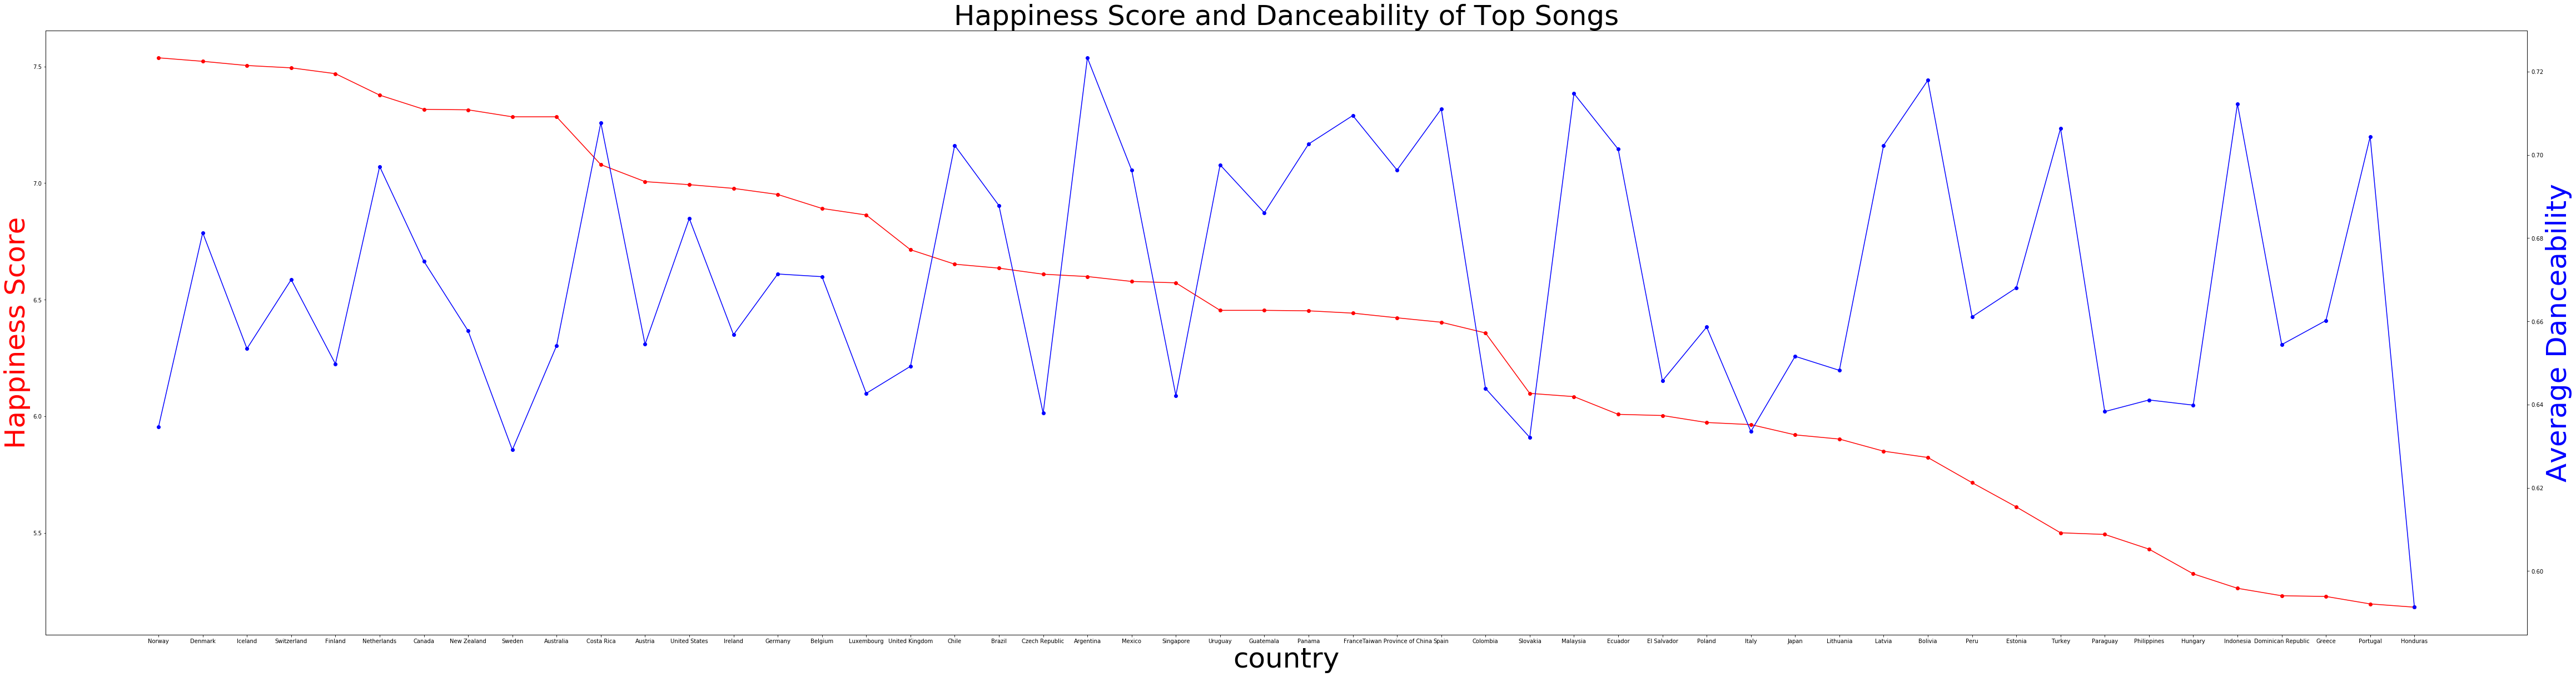

In [75]:
fig,ax = plt.subplots(figsize=(80,20))
ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
ax.set_xlabel("country",fontsize=50)
ax.set_ylabel("Happiness Score",color="red",fontsize=50)
ax2=ax.twinx()
ax2.plot(happy['country'], happy['avg_danceability'] ,color="blue",marker="o")
ax2.set_ylabel("Average Danceability",color="blue",fontsize=50)
plt.title('Happiness Score and Danceability of Top Songs', fontsize=50)
plt.show()

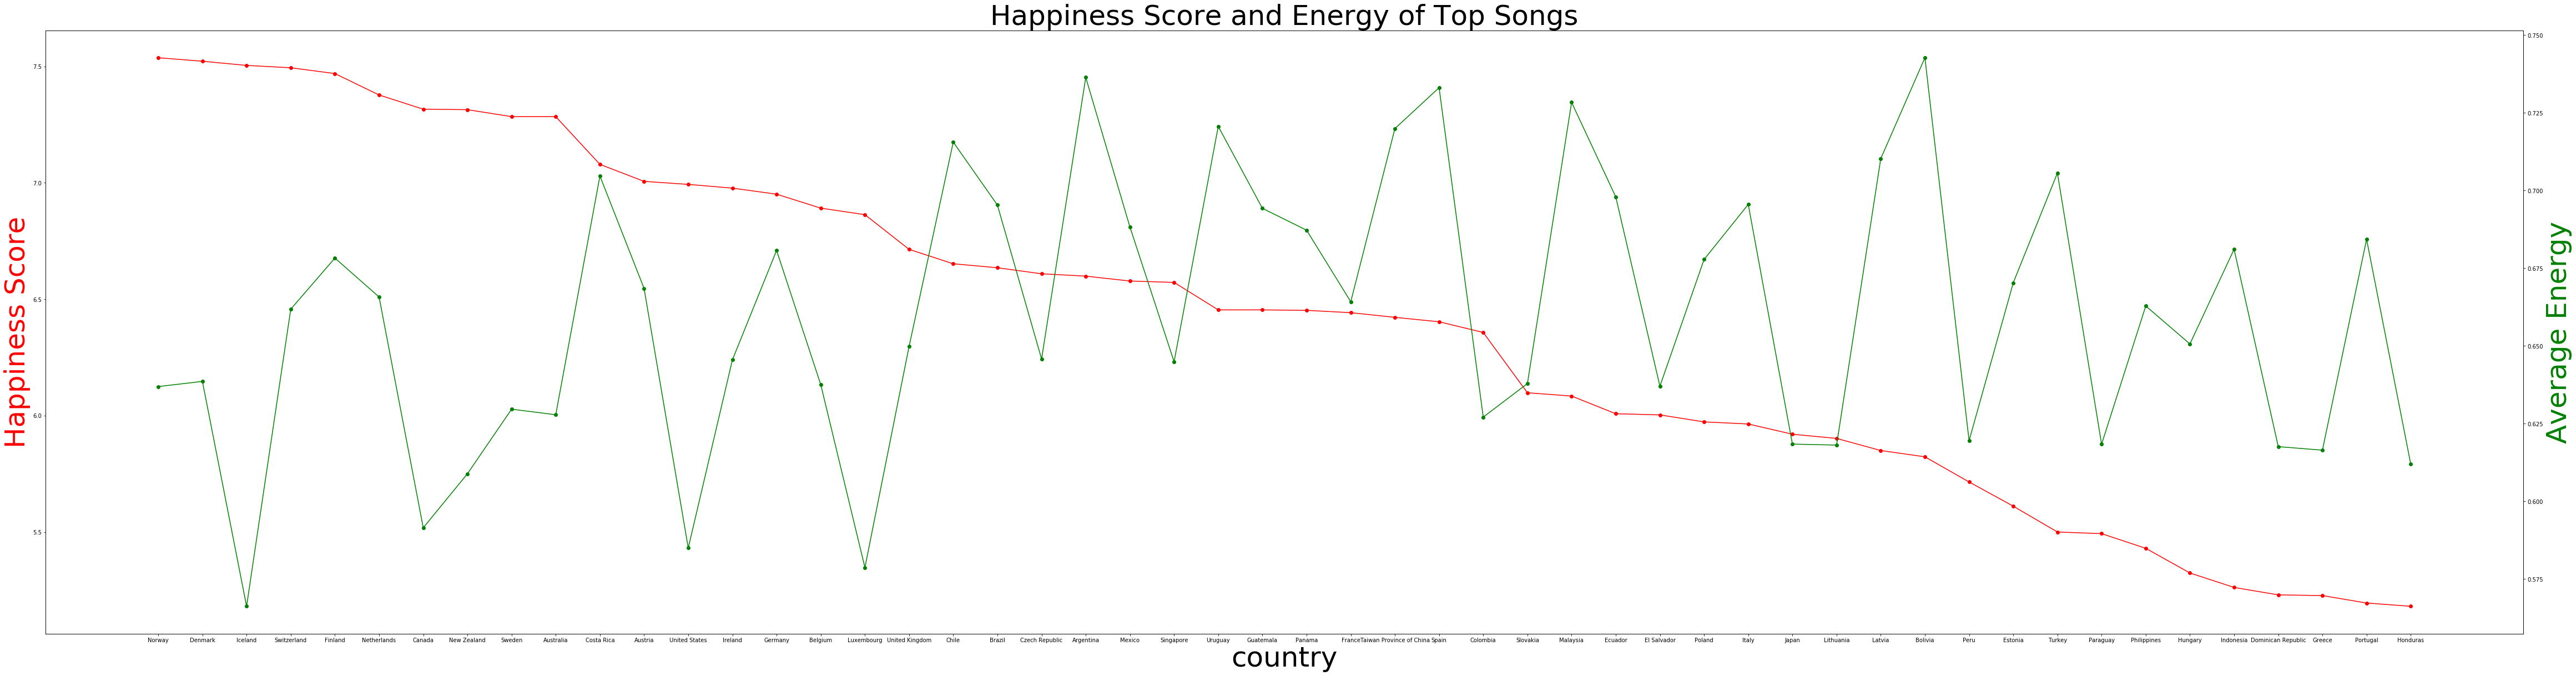

In [76]:
fig,ax = plt.subplots(figsize=(80,20))
ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
ax.set_xlabel("country",fontsize=50)
ax.set_ylabel("Happiness Score",color="red",fontsize=50)
ax2=ax.twinx()
ax2.plot(happy['country'], happy['avg_energy'] ,color="green",marker="o")
ax2.set_ylabel("Average Energy",color="green",fontsize=50)
plt.title('Happiness Score and Energy of Top Songs', fontsize=50)
plt.show()

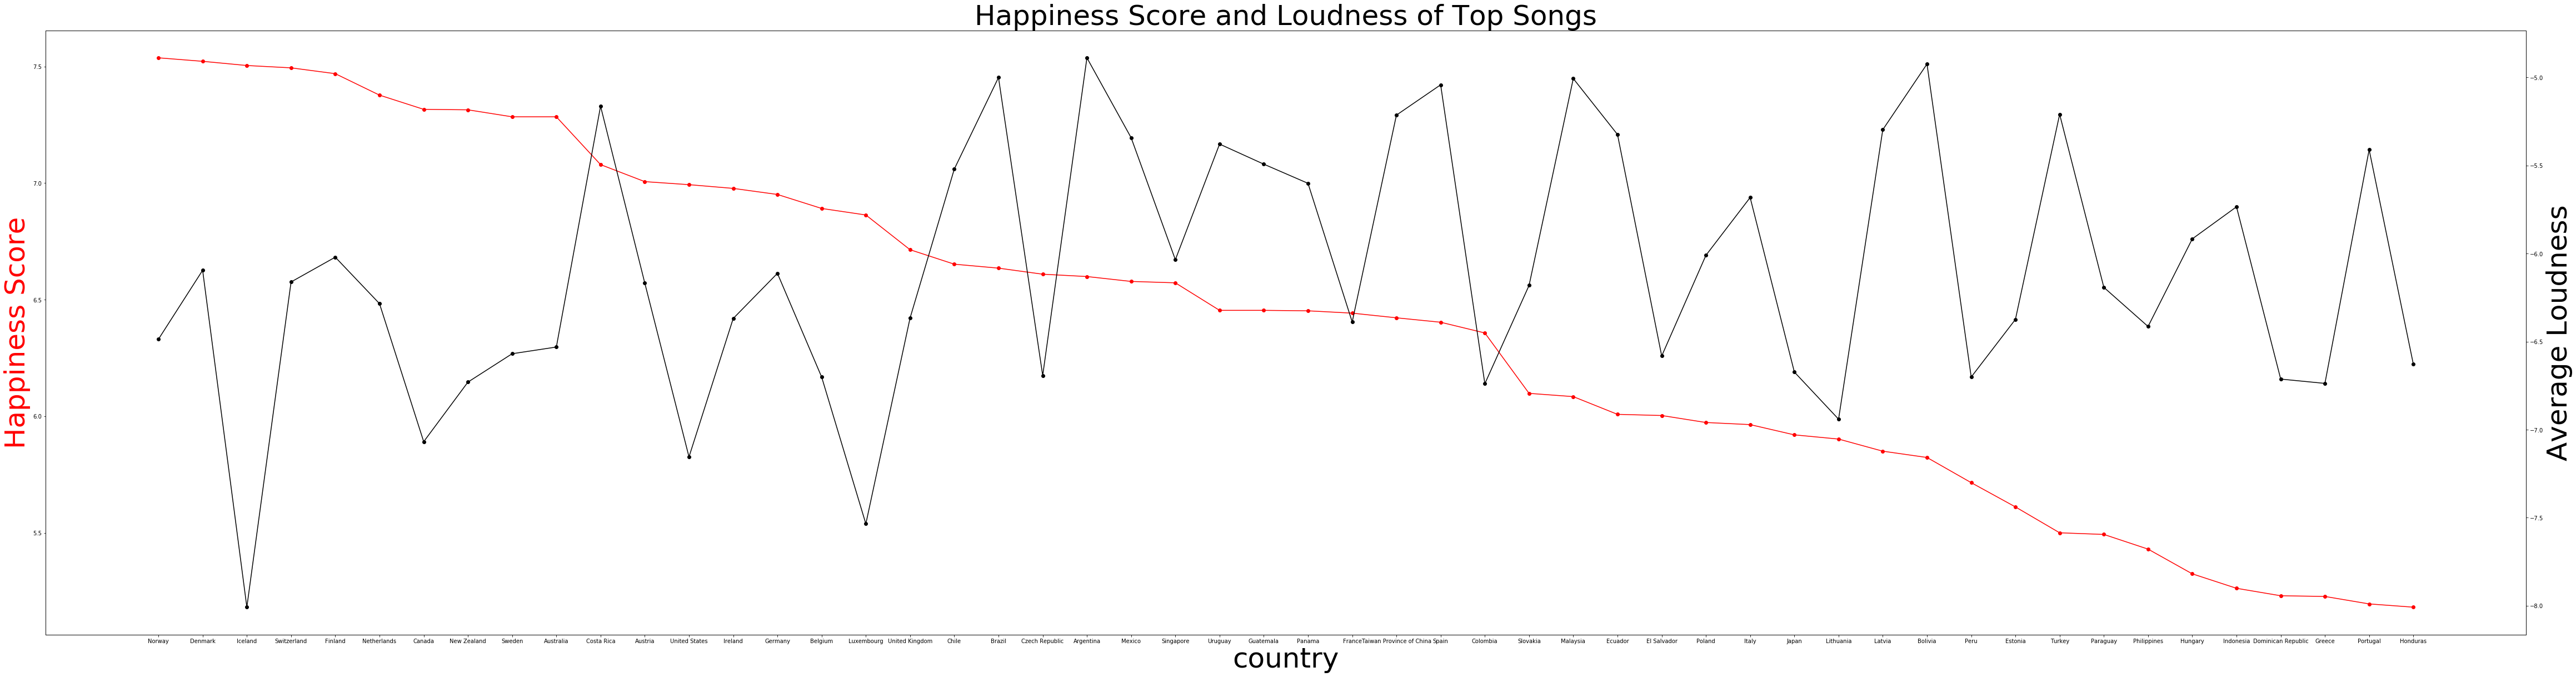

In [77]:
fig,ax = plt.subplots(figsize=(80,20))
ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
ax.set_xlabel("country",fontsize=50)
ax.set_ylabel("Happiness Score",color="red",fontsize=50)
ax2=ax.twinx()
ax2.plot(happy['country'], happy['avg_loudness'] ,color="black",marker="o")
ax2.set_ylabel("Average Loudness",color="black",fontsize=50)
plt.title('Happiness Score and Loudness of Top Songs', fontsize=50)
plt.show()

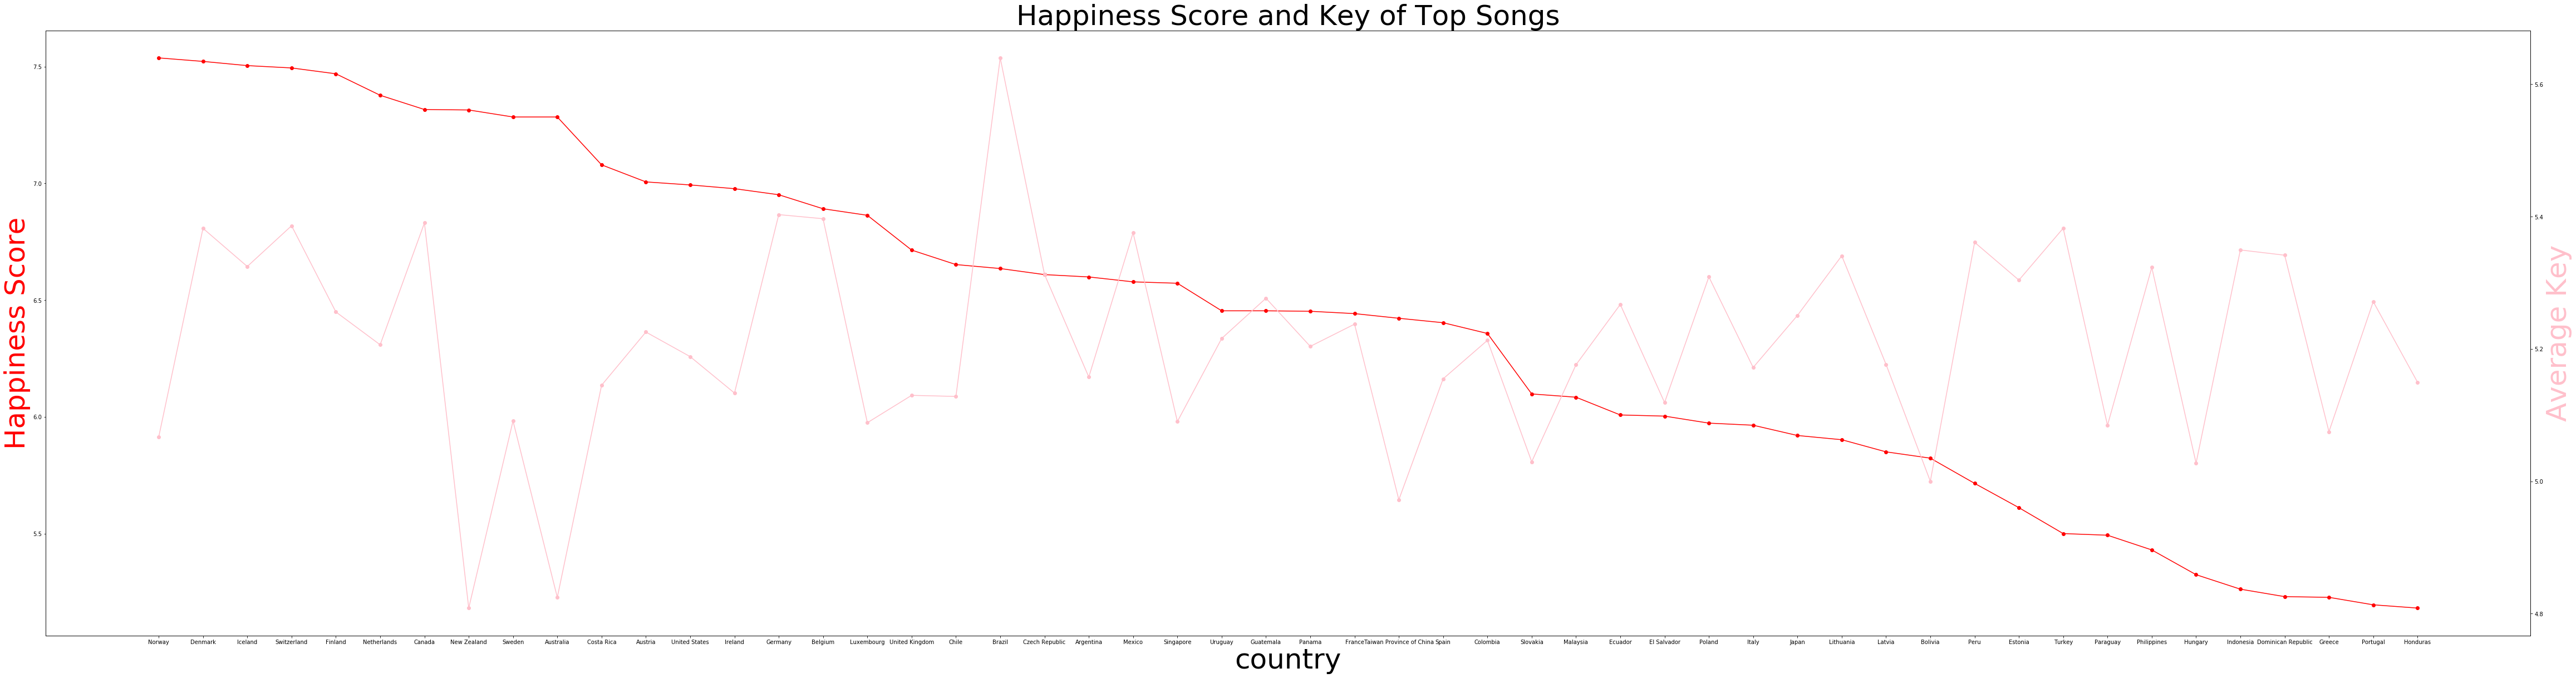

In [78]:
fig,ax = plt.subplots(figsize=(80,20))
ax.plot(happy['country'], happy['happiness_score'], color="red", marker="o")
ax.set_xlabel("country",fontsize=50)
ax.set_ylabel("Happiness Score",color="red",fontsize=50)
ax2=ax.twinx()
ax2.plot(happy['country'], happy['avg_key'] ,color="pink",marker="o")
ax2.set_ylabel("Average Key",color="pink",fontsize=50)
plt.title('Happiness Score and Key of Top Songs', fontsize=50)
plt.show()

In [48]:
affileznames=[]
for file in affilez:
    affileznames.append(str(file))

In [52]:
for file in affilez:
    for filename in affileznames:
        print(filename+':')
        (file.describe())

     danceability  energy   key  loudness  mode  speechiness  acousticness  \
0           0.676   0.929  10.0    -3.194   1.0       0.0458        0.1860   
1           0.720   0.763   9.0    -4.068   0.0       0.0523        0.4060   
2           0.735   0.451   0.0    -8.374   1.0       0.0585        0.0631   
3           0.670   0.838   0.0    -4.031   1.0       0.0362        0.0604   
4           0.773   0.819   0.0    -5.946   0.0       0.1180        0.4260   
..            ...     ...   ...       ...   ...          ...           ...   
354         0.465   0.270   4.0   -16.661   1.0       0.0425        0.9000   
355         0.317   0.158   9.0   -16.485   1.0       0.0381        0.6730   
356         0.765   0.688   4.0    -5.566   1.0       0.0841        0.6330   
357         0.643   0.709   0.0    -4.343   1.0       0.0733        0.1450   
358         0.506   0.378   9.0    -9.258   1.0       0.0288        0.8220   

     instrumentalness  liveness  valence    tempo            ty

KeyboardInterrupt: 

In [39]:
# Our Spotify API code has a limit on the number of times we can retrieve the API features and we have exceeded that limit

# VI. Questions for reviewers

1. We think that we are using the spotify API correctly, however we can’t get it to work in the for-loop and went to multiple office hours trying to resolve this issue. Any suggestions would be appreciated! We decided to implement getunique() because we thought that this would make the program more efficient, but it still doesn’t work.

2. When comparing country to country, we're pretty concerned about sampling and random sampling, social events can happen on certain days and affect moods for different countries. How should we go about comparing days in countries?

3. For loop issues in data cleaning. We're not really sure why it's not working

4. What graphs/visualizations would you recommend for us to use?

5. In the first_fifty method, you can see that not all countries have the same length of songs. How would we then be able to accurately get the top 50 of every song?